In [1]:
!cp -r /kaggle/input/yolov8/mydataset /kaggle/working/
!cp -r /kaggle/input/yolov8/mydata.yaml /kaggle/working/mydata.yaml

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [3]:
import os
import random
import shutil
from math import floor

# 定义数据集的路径
dataset_path = '/kaggle/working/mydataset'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')

# 创建训练、验证和测试集的目录结构
train_images_path = os.path.join(images_path, 'train')
val_images_path = os.path.join(images_path, 'val')
test_images_path = os.path.join(images_path, 'test')

train_labels_path = os.path.join(labels_path, 'train')
val_labels_path = os.path.join(labels_path, 'val')
test_labels_path = os.path.join(labels_path, 'test')

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)
os.makedirs(test_labels_path, exist_ok=True)

# 获取所有图片文件名
image_files = [f for f in os.listdir(images_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 打乱文件顺序
random.shuffle(image_files)

# 计算每个子集的大小
total_images = len(image_files)
train_size = floor(total_images * 0.7)
val_size = floor(total_images * 0.1)
test_size = total_images - train_size - val_size

# 划分数据集
train_files = image_files[:train_size]
val_files = image_files[train_size:train_size + val_size]
test_files = image_files[train_size + val_size:]

def copy_files(file_list, source_dir, dest_dir):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        image_source = os.path.join(source_dir, file_name)
        label_source = os.path.join(labels_path, f"{base_name}.txt")

        image_dest = os.path.join(dest_dir, file_name)
        label_dest = os.path.join(dest_dir.replace('images', 'labels'), f"{base_name}.txt")

        shutil.copy2(image_source, image_dest)
        shutil.copy2(label_source, label_dest)

# 复制训练集文件
copy_files(train_files, images_path, train_images_path)

# 复制验证集文件
copy_files(val_files, images_path, val_images_path)

# 复制测试集文件
copy_files(test_files, images_path, test_images_path)

print("数据集划分完成：")
print(f"训练集: {len(train_files)} 个文件")
print(f"验证集: {len(val_files)} 个文件")
print(f"测试集: {len(test_files)} 个文件")


数据集划分完成：
训练集: 40 个文件
验证集: 5 个文件
测试集: 13 个文件


In [14]:
from ultralytics import YOLO

# 加载预训练模型
model = YOLO('yolov8m.pt')

# 配置数据集路径和参数
data_config = '/kaggle/working/mydata.yaml'
epochs = 500
batch_size = 32

# 开始训练
model.train(data=data_config, epochs=epochs, batch=batch_size, imgsz=640)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/mydata.yaml, epochs=500, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

train: Scanning /kaggle/working/mydataset/labels/train.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/mydataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      13.4G      4.598      5.008      2.795        385        640: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          5         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      13.3G      4.559      5.028      3.095        242        640: 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.90it/s]

                   all          5         74          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      13.5G      4.523      4.854      2.864        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.57it/s]

                   all          5         74   0.000267    0.00699   0.000144   1.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      13.8G      4.533      4.947      3.103        222        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.98it/s]

                   all          5         74    0.00026    0.00699   0.000142   1.42e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      13.3G      4.738      4.942      2.989        370        640: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.07it/s]

                   all          5         74   0.000242    0.00699   0.000191   1.91e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      13.5G      4.027      4.391      2.565        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.39it/s]

                   all          5         74    0.00103     0.0135    0.00157   0.000157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500        14G      3.251      3.886      1.976        211        640: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.48it/s]

                   all          5         74      0.566      0.013     0.0121    0.00245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      14.1G      2.669      3.231      1.646        284        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.08it/s]

                   all          5         74     0.0227      0.342     0.0423    0.00853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      13.5G      2.392      2.774       1.43        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.87it/s]

                   all          5         74      0.439      0.176     0.0834     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      13.5G      2.286      2.474      1.322        333        640: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.87it/s]

                   all          5         74      0.297      0.302      0.133     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      13.5G      2.083      2.284      1.256        302        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]

                   all          5         74      0.248      0.595      0.291      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      14.4G       1.96      2.107      1.219        338        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all          5         74      0.514      0.444      0.313      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500        14G      1.944      2.101        1.2        249        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.07it/s]

                   all          5         74      0.367      0.597      0.321      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500        14G      1.822        1.9       1.15        313        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.69it/s]

                   all          5         74       0.34      0.706      0.439      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      13.9G      1.941      1.808      1.269        232        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.69it/s]

                   all          5         74      0.366      0.738      0.504      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      13.6G      1.856      1.788      1.134        228        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.55it/s]

                   all          5         74      0.349      0.732      0.526      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500        14G      1.862      1.707      1.193        248        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.65it/s]

                   all          5         74      0.385      0.742      0.509      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500        14G      1.855      1.925      1.188        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.29it/s]

                   all          5         74      0.409       0.71      0.603      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500        14G      1.847      1.736      1.143        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.48it/s]

                   all          5         74      0.312      0.858      0.574      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500        14G      1.871      1.582      1.166        286        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.86it/s]

                   all          5         74      0.359      0.818      0.546      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      13.6G      1.785      1.714      1.116        331        640: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.37it/s]

                   all          5         74      0.376      0.703      0.519      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500        14G       1.76       1.43       1.21        293        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.57it/s]

                   all          5         74      0.655      0.554      0.574      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      13.7G      1.844      1.482      1.222        233        640: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.64it/s]

                   all          5         74      0.654      0.662      0.724      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500        14G      1.827      1.398      1.184        253        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]

                   all          5         74      0.603      0.744       0.71      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500        14G      1.908      1.344      1.214        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.46it/s]

                   all          5         74      0.593      0.709      0.657      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500        14G      1.794      1.406      1.116        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.81it/s]

                   all          5         74      0.684      0.736       0.68       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500        14G      1.792      1.373      1.172        347        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.75it/s]

                   all          5         74      0.722      0.746      0.795      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      14.2G      1.753      1.327      1.147        367        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.96it/s]

                   all          5         74      0.659      0.723      0.724      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      14.2G      1.755      1.311       1.13        265        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]

                   all          5         74      0.546      0.878      0.819      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      13.6G      1.653      1.345      1.077        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.89it/s]

                   all          5         74      0.693      0.814      0.802      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500        14G       1.75      1.322      1.104        357        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.94it/s]

                   all          5         74      0.687      0.754      0.814      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      13.5G      1.629      1.233      1.124        314        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.91it/s]

                   all          5         74      0.765      0.848      0.859      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      13.5G      1.659      1.246      1.119        246        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.24it/s]

                   all          5         74        0.8      0.802      0.861      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500        14G      1.711      1.245      1.142        246        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.85it/s]

                   all          5         74      0.862      0.866      0.921       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500        14G      1.697      1.176      1.174        267        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.64it/s]

                   all          5         74      0.756      0.869       0.83      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500        14G      1.693      1.218      1.118        296        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.61it/s]

                   all          5         74       0.77       0.81      0.825      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      13.5G      1.702      1.252       1.06        414        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.31it/s]

                   all          5         74      0.715      0.894      0.873      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500        14G      1.604      1.133       1.15        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.35it/s]

                   all          5         74      0.598      0.767      0.724        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      13.6G      1.793      1.134      1.227        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.81it/s]

                   all          5         74      0.764      0.768      0.862       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500        14G      1.768      1.162      1.159        296        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.78it/s]

                   all          5         74      0.706       0.95       0.91      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      14.2G      1.729      1.138      1.069        361        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.21it/s]

                   all          5         74      0.861      0.923      0.941      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500        14G      1.718      1.191      1.068        306        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.64it/s]

                   all          5         74       0.86      0.914      0.904      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500        14G      1.607      1.132      1.102        213        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]

                   all          5         74      0.769      0.871      0.867      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      14.1G      1.675       1.11      1.088        330        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.41it/s]

                   all          5         74      0.772      0.816      0.841      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      13.5G      1.627      1.077      1.107        309        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.61it/s]

                   all          5         74      0.703      0.883      0.884      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500        14G      1.621      1.122      1.063        253        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.08it/s]

                   all          5         74      0.796      0.905      0.932      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      13.4G      1.568      1.119      1.085        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.62it/s]

                   all          5         74      0.793      0.871      0.864      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      13.4G      1.591     0.9935      1.092        309        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.00it/s]

                   all          5         74      0.784      0.912      0.875       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500        14G      1.537      1.015      1.071        266        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.97it/s]

                   all          5         74      0.756       0.88      0.877      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      13.6G      1.517     0.9017      1.079        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]

                   all          5         74      0.752       0.91      0.877      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500        14G      1.604      1.004      1.067        296        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.54it/s]

                   all          5         74      0.737      0.873      0.835      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      13.7G      1.581     0.9103      1.104        265        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]

                   all          5         74      0.807      0.819      0.856      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      14.1G      1.659      1.026      1.101        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.00it/s]

                   all          5         74      0.731      0.878      0.873      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      13.5G      1.589      1.056      1.084        231        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.49it/s]

                   all          5         74      0.804      0.866      0.901      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500        14G      1.596      1.001      1.046        287        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.07it/s]

                   all          5         74      0.743      0.817      0.815      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500        14G      1.583      1.009      1.097        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.95it/s]

                   all          5         74      0.763      0.783      0.839      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500        14G      1.513      0.942      1.032        339        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.69it/s]

                   all          5         74      0.734      0.842      0.846      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      13.6G      1.587      1.128      1.015        359        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.17it/s]

                   all          5         74      0.725      0.812      0.793      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500        14G      1.442     0.9355      1.059        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.60it/s]

                   all          5         74      0.783      0.928      0.909      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500        14G      1.513     0.9026      1.076        244        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.32it/s]

                   all          5         74      0.812      0.887      0.918      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500        14G      1.471     0.8743      1.049        271        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.43it/s]

                   all          5         74      0.827      0.904      0.919      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      13.5G      1.469     0.8499      1.058        249        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.16it/s]

                   all          5         74      0.824       0.83      0.856      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      13.6G      1.402     0.8834      1.036        246        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          5         74      0.669      0.807      0.749      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      13.7G      1.479     0.8469      1.054        286        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.25it/s]

                   all          5         74      0.707      0.829      0.787      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      14.4G      1.465     0.8587      1.034        304        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.64it/s]

                   all          5         74      0.721      0.848      0.816      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500        14G      1.464     0.8184      1.092        264        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.41it/s]

                   all          5         74       0.75      0.839      0.829      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      14.4G      1.483     0.9193      1.061        285        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.44it/s]

                   all          5         74      0.773      0.823      0.826      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      13.5G      1.396     0.8262      1.048        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.48it/s]

                   all          5         74      0.767      0.834      0.831      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      13.5G      1.462     0.8903       1.03        343        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.50it/s]

                   all          5         74      0.747      0.796      0.798      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      13.5G      1.537     0.8841       1.03        307        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.02it/s]

                   all          5         74       0.85       0.88      0.905      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      13.6G      1.538      0.869      1.069        302        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.18it/s]

                   all          5         74      0.737      0.844      0.843      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      13.7G      1.436     0.8326       1.06        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.60it/s]

                   all          5         74      0.705      0.823      0.807      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500        14G      1.436     0.8387      1.045        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.04it/s]

                   all          5         74      0.724      0.813      0.788      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      13.4G       1.46     0.8201       1.01        317        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.80it/s]

                   all          5         74      0.751      0.881       0.87      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500        14G      1.524     0.8866      1.045        304        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.20it/s]

                   all          5         74      0.804      0.888      0.897      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      13.5G      1.491     0.8075      1.043        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          5         74      0.768       0.89      0.909      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500        14G      1.378     0.7689      1.029        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          5         74       0.78      0.912      0.935      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      13.9G      1.401     0.8119      1.001        391        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.80it/s]

                   all          5         74      0.741      0.833      0.827      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      13.5G      1.375     0.8101     0.9939        256        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.57it/s]

                   all          5         74      0.747      0.851       0.83      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500        14G      1.396     0.7716      1.063        228        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.56it/s]

                   all          5         74       0.71      0.894      0.764      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      13.5G      1.452     0.8043      1.076        246        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.66it/s]

                   all          5         74      0.777      0.887      0.858      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      13.6G      1.292     0.7506      1.013        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.07it/s]

                   all          5         74      0.767      0.827      0.808      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      13.4G      1.266      0.726      1.017        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]

                   all          5         74      0.734      0.829      0.762       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      13.7G      1.392     0.7734     0.9884        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.84it/s]

                   all          5         74      0.762      0.839      0.792      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      13.5G      1.242     0.7266     0.9764        347        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.14it/s]

                   all          5         74      0.767      0.823      0.787      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      13.5G      1.446     0.8271      1.019        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.88it/s]

                   all          5         74      0.866      0.889      0.884      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      13.5G      1.204     0.6976     0.9952        329        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.93it/s]

                   all          5         74       0.74      0.817      0.783      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      13.5G      1.533     0.8497     0.9957        357        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.05it/s]

                   all          5         74      0.733      0.821      0.789      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      13.4G       1.37     0.7218      1.012        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.59it/s]

                   all          5         74      0.767      0.865       0.83       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500        14G      1.311     0.7256      1.031        251        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          5         74      0.778      0.837      0.799      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      13.5G      1.236      0.714     0.9667        371        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.23it/s]

                   all          5         74      0.768       0.85      0.803      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      13.5G      1.255     0.7169      0.979        295        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.10it/s]

                   all          5         74      0.814       0.94      0.896      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      13.7G      1.257     0.6835      1.007        285        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.81it/s]

                   all          5         74        0.8      0.927      0.883      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500        14G      1.371     0.7864     0.9392        334        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.71it/s]

                   all          5         74      0.802      0.922      0.874      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500        14G      1.276     0.7751     0.9719        331        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.92it/s]

                   all          5         74      0.833      0.929      0.875      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      13.4G      1.283     0.7457     0.9474        311        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.33it/s]

                   all          5         74      0.808      0.892      0.888      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      14.1G      1.292     0.7251     0.9803        320        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.42it/s]

                   all          5         74      0.787      0.898      0.891      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      13.4G      1.277      0.715     0.9671        293        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.83it/s]

                   all          5         74      0.841      0.898       0.93      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      13.5G      1.253     0.7331     0.9796        232        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.26it/s]

                   all          5         74      0.862      0.901      0.917      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      13.6G      1.352     0.8092     0.9515        321        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.94it/s]

                   all          5         74      0.729      0.873       0.83      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      13.7G        1.2     0.6899     0.9705        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.98it/s]

                   all          5         74      0.726      0.821      0.781      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      13.5G      1.176     0.7016     0.9682        248        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.71it/s]

                   all          5         74      0.706      0.755      0.727      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500        13G      1.258     0.7223     0.9679        367        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.75it/s]

                   all          5         74      0.716      0.778      0.745      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      13.4G      1.307     0.7411     0.9577        325        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          5         74      0.844      0.906      0.895      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      13.9G      1.238     0.6885      1.004        275        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.96it/s]

                   all          5         74      0.849       0.91      0.891      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500        14G      1.257     0.6936     0.9837        300        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.59it/s]

                   all          5         74      0.854      0.906      0.916      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      13.5G      1.117     0.6341     0.9577        299        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all          5         74      0.829      0.897      0.901      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      14.1G      1.173     0.6181     0.9977        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.64it/s]

                   all          5         74      0.725      0.955      0.893       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500        14G      1.397     0.7251      1.012        218        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.25it/s]

                   all          5         74      0.726      0.919      0.897      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500        14G      1.198     0.6659     0.9777        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.78it/s]

                   all          5         74      0.777      0.925      0.898      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500        14G      1.195     0.6569     0.9605        290        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.77it/s]

                   all          5         74      0.823      0.917      0.884      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500        14G      1.219     0.6749     0.9787        320        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]

                   all          5         74      0.705      0.895      0.823      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      14.1G       1.15     0.6301     0.9535        315        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.42it/s]

                   all          5         74      0.756      0.937      0.883      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500        14G      1.144     0.6194     0.9207        336        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.09it/s]

                   all          5         74      0.794      0.961      0.925      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500        14G      1.168     0.6397     0.9387        286        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.56it/s]

                   all          5         74      0.775      0.966      0.902      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500        14G       1.24     0.6459     0.9654        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.85it/s]

                   all          5         74      0.794      0.937      0.909      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      13.5G      1.154     0.6321     0.9658        260        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.92it/s]

                   all          5         74      0.839      0.899      0.921       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      13.6G      1.181      0.646     0.9709        302        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.07it/s]

                   all          5         74      0.742      0.804      0.796      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500        14G      1.226     0.6631     0.9382        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.87it/s]

                   all          5         74      0.745      0.805      0.805      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      13.5G       1.12     0.6199     0.9431        300        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.45it/s]

                   all          5         74       0.81      0.912       0.88      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      13.5G      1.127     0.6082     0.9372        270        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.63it/s]

                   all          5         74      0.806      0.933      0.879      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      13.6G      1.072     0.5623     0.9604        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.84it/s]

                   all          5         74      0.738      0.942      0.869      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      13.5G      1.181     0.6375     0.9345        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.70it/s]

                   all          5         74      0.741      0.931      0.875      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      14.1G      1.135     0.6271      0.925        212        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.13it/s]

                   all          5         74      0.745      0.929      0.876      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      13.5G      1.106     0.6331     0.9174        369        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.79it/s]

                   all          5         74      0.811      0.902      0.905      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500        13G      1.123     0.6496     0.9255        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.19it/s]

                   all          5         74      0.821      0.878      0.908       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500        14G      1.168     0.6405     0.9372        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.74it/s]

                   all          5         74      0.746      0.818      0.829      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      13.7G      1.199     0.6396     0.9684        262        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.98it/s]

                   all          5         74      0.772       0.82       0.82      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500        14G       1.04     0.5831     0.9131        332        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.40it/s]

                   all          5         74      0.777      0.914      0.871      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      13.4G       1.09     0.6218     0.9522        222        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          5         74      0.809      0.923      0.869      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      13.6G      1.141     0.6376     0.9359        240        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.71it/s]

                   all          5         74      0.816      0.916      0.881      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      13.5G      1.062     0.5697     0.9365        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          5         74      0.812      0.911      0.892      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      13.5G      1.052      0.585     0.8881        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.71it/s]

                   all          5         74      0.828      0.903      0.893      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      13.5G      1.104     0.6042     0.9253        310        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all          5         74      0.779      0.824      0.802      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500        14G      1.096     0.6069     0.9417        257        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]

                   all          5         74      0.827      0.923      0.895      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      13.4G      1.073     0.5596     0.9449        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.63it/s]

                   all          5         74      0.817       0.92       0.89      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      13.6G      1.087     0.5921     0.9457        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.41it/s]

                   all          5         74      0.831      0.907      0.889      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500        14G      1.049     0.5704       0.93        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.09it/s]

                   all          5         74      0.814      0.905       0.89       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500        14G      1.064     0.5827     0.8949        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all          5         74      0.812      0.893      0.896      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500        14G      1.079     0.5758     0.9386        214        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.89it/s]

                   all          5         74       0.87      0.857       0.91        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      13.7G      1.093      0.599     0.9278        284        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.83it/s]

                   all          5         74      0.776      0.773      0.813      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500        14G      1.077     0.6255     0.9453        241        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.70it/s]

                   all          5         74      0.823      0.911      0.914       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      13.5G      1.031     0.5875     0.9151        263        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          5         74      0.829      0.942      0.942      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500        14G      1.061     0.5934     0.9371        265        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.34it/s]

                   all          5         74      0.762      0.938      0.929       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      13.5G       1.02       0.59     0.9124        328        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.85it/s]

                   all          5         74      0.835      0.943      0.939      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      13.5G     0.9786     0.5781     0.9036        346        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.81it/s]

                   all          5         74      0.839      0.958      0.935      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      13.7G     0.9577     0.5184     0.9018        225        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.56it/s]

                   all          5         74      0.853      0.949       0.93      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      13.6G     0.9965     0.5443     0.9292        250        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]

                   all          5         74      0.861      0.945      0.928      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      13.4G      1.093     0.5818     0.8852        393        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.11it/s]

                   all          5         74      0.858      0.962      0.938      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      13.5G     0.9889     0.5631     0.9048        366        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.74it/s]

                   all          5         74      0.861      0.964      0.938      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      13.4G     0.9696     0.5445     0.8966        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.91it/s]

                   all          5         74      0.869      0.965      0.941      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500        14G      1.015     0.5375     0.9068        221        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]

                   all          5         74      0.858      0.957      0.928      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      13.5G      1.023     0.5404      0.906        227        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.38it/s]

                   all          5         74      0.804      0.851      0.845      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500        14G      1.021     0.5413     0.8895        296        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.06it/s]

                   all          5         74      0.813      0.848      0.854      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500        14G     0.9816     0.5133     0.8976        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.29it/s]

                   all          5         74      0.864      0.917      0.905      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      14.2G      1.037      0.551      0.908        311        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.87it/s]

                   all          5         74      0.838      0.941      0.897      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      13.5G      0.954     0.5378     0.9026        344        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.51it/s]

                   all          5         74       0.84      0.943      0.925      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      13.5G      0.964     0.5136     0.9061        251        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.99it/s]

                   all          5         74      0.754      0.873      0.841      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500        14G     0.9182     0.5015     0.9225        224        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.43it/s]

                   all          5         74      0.773      0.865      0.835      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      13.4G      1.007     0.5297     0.8822        350        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          5         74      0.781      0.845      0.829      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      13.5G      1.047     0.5814     0.9111        311        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.53it/s]

                   all          5         74      0.874      0.932      0.917      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      13.5G     0.9559     0.5418     0.8956        304        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.53it/s]

                   all          5         74      0.883      0.936      0.933      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500        14G     0.9062     0.5096     0.8863        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.38it/s]

                   all          5         74      0.862      0.936      0.937      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      13.5G     0.9182      0.534     0.8792        317        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.06it/s]

                   all          5         74      0.851      0.912      0.928      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500        14G     0.9604      0.553     0.8824        324        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          5         74       0.88      0.909       0.94        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      13.5G      1.033     0.5727     0.9024        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.77it/s]

                   all          5         74      0.865      0.923      0.927       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      13.7G     0.9497     0.5369     0.8863        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.59it/s]

                   all          5         74      0.836      0.946      0.929      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      13.4G     0.9669     0.5573     0.9094        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.79it/s]

                   all          5         74      0.837      0.948      0.933      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500        14G     0.8439     0.4772     0.8802        275        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.19it/s]

                   all          5         74      0.832      0.958      0.937      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500        14G      0.935     0.5251     0.9032        239        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]

                   all          5         74      0.842      0.955      0.932      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      13.6G      1.012     0.5352     0.9042        335        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.21it/s]

                   all          5         74      0.866      0.965      0.953      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      13.5G      1.021     0.5337      0.927        199        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.64it/s]

                   all          5         74      0.817      0.963      0.942      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      13.4G     0.9943     0.6121     0.8784        404        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.61it/s]

                   all          5         74      0.803      0.955      0.919      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500        14G     0.8796     0.5143     0.8769        293        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.44it/s]

                   all          5         74      0.814      0.943      0.908      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500        14G     0.8734      0.492     0.8741        342        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.83it/s]

                   all          5         74      0.809      0.921      0.891      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      13.4G     0.9607     0.5751     0.8924        230        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.63it/s]

                   all          5         74      0.837      0.889      0.893      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      13.7G      0.924     0.5009     0.9155        243        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.20it/s]

                   all          5         74      0.832      0.866      0.889      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500        14G     0.8856     0.5091     0.8731        268        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.16it/s]

                   all          5         74      0.801      0.864      0.889       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500        14G     0.8556     0.5141     0.8821        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.14it/s]

                   all          5         74       0.83      0.871      0.888      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500        14G     0.9487     0.5145     0.9228        162        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.43it/s]

                   all          5         74       0.83      0.866      0.883      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500        14G     0.9752     0.5536     0.8948        235        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.55it/s]

                   all          5         74      0.821      0.836       0.88      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      14.2G     0.8032     0.4675     0.8602        204        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.82it/s]

                   all          5         74      0.732      0.939      0.869      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      13.1G     0.8966     0.5229     0.9055        292        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.66it/s]

                   all          5         74      0.755      0.961      0.897      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500        14G     0.8797     0.4908     0.8902        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.18it/s]

                   all          5         74      0.768      0.967      0.921      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500        14G     0.8906     0.5053     0.8739        346        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.25it/s]

                   all          5         74      0.813       0.94      0.923      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      14.1G     0.8944     0.4956     0.8978        232        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.73it/s]

                   all          5         74       0.83      0.886      0.907      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500        14G     0.8882     0.5128     0.8704        371        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.90it/s]

                   all          5         74      0.828      0.872      0.905      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500        14G     0.8863     0.4946      0.885        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.50it/s]

                   all          5         74      0.831       0.86      0.902      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500        14G     0.8431      0.482     0.8755        297        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.46it/s]

                   all          5         74      0.816      0.861      0.901      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500        14G       0.94     0.5112     0.8981        250        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.96it/s]

                   all          5         74      0.769      0.899      0.896       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      13.5G     0.8587     0.4731     0.8611        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.96it/s]

                   all          5         74      0.754      0.904      0.901      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      13.5G     0.8188       0.46     0.8903        293        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.85it/s]

                   all          5         74      0.776       0.87      0.904      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      13.4G     0.8623     0.4878     0.8578        322        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.57it/s]

                   all          5         74      0.716      0.871      0.821      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      13.4G     0.9717     0.5229     0.8815        223        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.84it/s]

                   all          5         74      0.791      0.931      0.912      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500        14G     0.8199     0.4616     0.8608        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          5         74      0.784      0.959       0.91      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      13.5G     0.9132     0.5105     0.8582        343        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.42it/s]

                   all          5         74       0.79      0.967      0.911      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500        14G       0.81     0.4667     0.8661        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.29it/s]

                   all          5         74      0.779      0.964      0.919      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      13.5G     0.8223     0.4731     0.8515        329        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.16it/s]

                   all          5         74       0.78      0.955       0.92      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500        14G     0.8201     0.4767     0.8412        324        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.91it/s]

                   all          5         74      0.785      0.946      0.926      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500        14G     0.8313     0.4539     0.8853        251        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.93it/s]

                   all          5         74      0.841      0.903      0.919      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      14.1G     0.8251     0.4637     0.8634        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.36it/s]

                   all          5         74      0.822      0.918      0.911      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500        14G      0.893     0.5018     0.8688        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.76it/s]

                   all          5         74      0.834      0.916      0.925      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      13.4G       0.81      0.467     0.8496        365        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.02it/s]

                   all          5         74      0.838      0.907      0.923      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500        14G     0.8652     0.4855     0.8642        372        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.37it/s]

                   all          5         74      0.839       0.96      0.932      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      13.8G       0.77     0.4786     0.8492        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.17it/s]

                   all          5         74      0.859       0.95      0.938      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      14.2G     0.8322     0.4791      0.858        390        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.69it/s]

                   all          5         74      0.829      0.917      0.928       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      13.4G     0.8221     0.4785     0.8561        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.21it/s]

                   all          5         74      0.852      0.906      0.932      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      13.4G      0.789      0.456     0.8856        275        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.45it/s]

                   all          5         74      0.814      0.884      0.899      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500        14G     0.8267     0.4676     0.8407        329        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          5         74      0.755      0.841      0.836      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      13.5G      0.893     0.5127     0.8534        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.51it/s]

                   all          5         74       0.84      0.883      0.898      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      13.5G     0.7638     0.4528     0.8537        262        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.37it/s]

                   all          5         74      0.887      0.899      0.918      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      13.5G     0.6984     0.4569     0.8395        329        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.92it/s]

                   all          5         74      0.879      0.913      0.918      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      13.6G     0.8006     0.4486     0.8591        233        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          5         74      0.884      0.909      0.922      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      13.5G     0.7797     0.4542     0.8667        246        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.53it/s]

                   all          5         74      0.874      0.909       0.92       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500        14G     0.8477     0.5096     0.8605        305        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.74it/s]

                   all          5         74      0.858      0.925      0.919      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      13.5G     0.7969     0.4437     0.8705        265        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.15it/s]

                   all          5         74      0.856      0.922      0.916      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      13.6G     0.7806     0.4323     0.8507        227        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.69it/s]

                   all          5         74      0.863      0.922      0.913      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500        14G     0.7466     0.4464     0.8632        224        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.63it/s]

                   all          5         74      0.832      0.941      0.926      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      13.9G     0.8501      0.465     0.8535        315        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.56it/s]

                   all          5         74      0.868      0.917      0.943      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500        14G      0.831     0.4544     0.8471        338        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.89it/s]

                   all          5         74      0.853      0.934      0.944       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500        14G     0.7864     0.4763     0.8653        202        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.31it/s]

                   all          5         74      0.846      0.914      0.939      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500        14G      0.789     0.4372     0.8548        263        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.32it/s]

                   all          5         74      0.866       0.88      0.934      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      14.1G     0.6963     0.4059     0.8486        213        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.03it/s]

                   all          5         74      0.811      0.963      0.933      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500        14G     0.7898     0.4479     0.8614        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.38it/s]

                   all          5         74      0.828      0.958      0.929      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      13.1G     0.7493     0.4215     0.8409        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.26it/s]

                   all          5         74      0.832      0.954      0.929      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500        14G     0.7356     0.4299     0.8663        295        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.54it/s]

                   all          5         74      0.845       0.95      0.926      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      13.6G     0.7705     0.4495     0.8512        213        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.30it/s]

                   all          5         74      0.853      0.952      0.925      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500        14G     0.8194     0.4567     0.8502        263        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.78it/s]

                   all          5         74      0.847      0.943      0.918      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      13.6G     0.8252     0.4653     0.8568        340        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.02it/s]

                   all          5         74      0.798      0.947      0.905      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      13.5G     0.7983     0.4533     0.8682        258        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.23it/s]

                   all          5         74      0.793      0.942      0.903      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      13.4G     0.7424     0.4378     0.8392        232        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.12it/s]

                   all          5         74      0.834      0.892      0.893      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500        14G     0.6283     0.3921     0.8372        296        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.06it/s]

                   all          5         74      0.831      0.895      0.893      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      13.5G     0.7901     0.4735     0.8699        290        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.82it/s]

                   all          5         74      0.793      0.938       0.91      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500        14G     0.7371     0.4307     0.8357        278        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.00it/s]

                   all          5         74      0.801      0.955      0.929      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      13.5G     0.8182     0.4503     0.8564        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          5         74       0.81      0.935      0.929      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      13.5G     0.7459     0.4269     0.8427        307        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.50it/s]

                   all          5         74      0.837      0.908      0.936      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500        13G     0.8072     0.4521     0.8866        298        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.80it/s]

                   all          5         74      0.858      0.917      0.938      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      13.5G     0.8525     0.4633     0.8388        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.99it/s]

                   all          5         74      0.857      0.926      0.941      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      13.4G     0.8262     0.4467     0.8629        306        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.76it/s]

                   all          5         74      0.849      0.938      0.946       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      13.6G     0.8074     0.4313     0.8445        274        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.58it/s]

                   all          5         74      0.835      0.947      0.943      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500        14G      0.687     0.4089     0.8343        258        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.20it/s]

                   all          5         74      0.817      0.935      0.918      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500        14G     0.7553     0.4384     0.8262        330        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          5         74      0.799      0.948      0.913      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      13.5G     0.7702     0.4137     0.8587        303        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.42it/s]

                   all          5         74      0.843      0.921      0.936      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500        14G     0.7047     0.3992     0.8469        259        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.53it/s]

                   all          5         74      0.847      0.918      0.945      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      13.5G     0.7423     0.4256     0.8508        271        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.34it/s]

                   all          5         74      0.857      0.917      0.946       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500        14G     0.7213     0.4128     0.8478        305        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.82it/s]

                   all          5         74      0.849      0.921      0.943       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500        14G     0.7114     0.4242     0.8427        273        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.76it/s]

                   all          5         74      0.848      0.925      0.941      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500        14G     0.7026     0.3963     0.8551        311        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.01it/s]

                   all          5         74       0.85      0.914      0.937      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500        14G     0.6488     0.3925     0.8329        266        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.81it/s]

                   all          5         74      0.829      0.915      0.936      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      13.4G     0.6912      0.394     0.8409        297        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.35it/s]

                   all          5         74       0.81      0.922      0.936      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500        14G     0.7704     0.4378     0.8743        179        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.98it/s]

                   all          5         74      0.821      0.911      0.937       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      13.5G     0.7141     0.4165     0.8557        258        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.63it/s]

                   all          5         74      0.815      0.926      0.932      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      13.5G     0.7471     0.4164     0.8625        255        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.55it/s]

                   all          5         74      0.819      0.916       0.93      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      13.5G     0.8003     0.4363     0.8642        232        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.35it/s]

                   all          5         74      0.835      0.927      0.932        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      13.5G     0.7059     0.4245     0.8354        253        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.69it/s]

                   all          5         74      0.856      0.932      0.934        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      13.5G     0.6769      0.401      0.838        323        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.88it/s]

                   all          5         74      0.861      0.923      0.933      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      13.9G     0.7643     0.4291     0.8479        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.98it/s]

                   all          5         74      0.846      0.925      0.929      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      13.4G     0.6631     0.4059     0.8181        317        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          5         74       0.85      0.919      0.914      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      13.5G     0.6706     0.4002     0.8481        272        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          5         74      0.848      0.918      0.917        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      13.5G     0.6807     0.3898     0.8445        212        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.88it/s]

                   all          5         74      0.845      0.922      0.917      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500        14G     0.6866     0.3919     0.8472        261        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.62it/s]

                   all          5         74      0.842      0.932       0.92      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      14.2G     0.6657     0.3788     0.8422        285        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.57it/s]

                   all          5         74      0.846      0.933      0.916      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      13.5G     0.7091     0.4207     0.8449        315        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.44it/s]

                   all          5         74      0.845      0.933      0.919      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500        14G       0.73     0.4188      0.837        345        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.36it/s]

                   all          5         74      0.837      0.938      0.935      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500        14G     0.6565     0.3877     0.8509        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.77it/s]

                   all          5         74      0.826      0.943      0.935        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      14.2G     0.6183     0.3794     0.8265        326        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.05it/s]

                   all          5         74      0.829      0.933      0.933      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      13.5G     0.6405      0.383     0.8209        266        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.13it/s]

                   all          5         74      0.843      0.922      0.934      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500        14G     0.6428     0.3879     0.8416        271        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.39it/s]

                   all          5         74      0.841      0.934      0.936      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500        14G     0.6987     0.4139     0.8361        263        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.59it/s]

                   all          5         74      0.842      0.935      0.935      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      13.5G      0.703     0.4156     0.8324        374        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.01it/s]

                   all          5         74      0.846      0.927      0.933      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500        14G     0.7266     0.4345     0.8301        318        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.64it/s]

                   all          5         74      0.832      0.916      0.912      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      14.2G     0.7469     0.4411     0.8471        278        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.10it/s]

                   all          5         74      0.831       0.92      0.913      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500        14G     0.6655     0.4071     0.8301        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.50it/s]

                   all          5         74      0.832      0.923      0.898      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      13.5G     0.6564     0.3816     0.8406        245        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.97it/s]

                   all          5         74      0.833      0.925      0.902      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      13.5G     0.7209     0.4165     0.8204        334        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.86it/s]

                   all          5         74      0.849      0.948      0.928      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      14.4G     0.6747     0.4074     0.8433        327        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.17it/s]

                   all          5         74      0.858      0.961      0.928      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500        14G     0.7223      0.418     0.8349        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.09it/s]

                   all          5         74      0.863      0.959      0.941      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      13.6G     0.6522     0.4107     0.8305        304        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.02it/s]

                   all          5         74      0.859      0.963      0.944      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500        14G     0.7057     0.3975     0.8512        267        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.27it/s]

                   all          5         74      0.848      0.962      0.926      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      13.7G      0.752     0.4221     0.8274        313        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          5         74      0.845      0.967      0.926      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      13.5G     0.5969     0.3632     0.8367        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.92it/s]

                   all          5         74      0.846      0.961      0.923      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      13.7G     0.6184     0.3762     0.8264        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.22it/s]

                   all          5         74      0.855      0.953      0.937      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500        14G     0.6542     0.3709     0.8304        294        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.10it/s]

                   all          5         74      0.862       0.95      0.938      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      14.1G     0.7151     0.4257     0.8506        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.42it/s]

                   all          5         74      0.865      0.948      0.939      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      13.5G     0.6939     0.4285     0.8367        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.09it/s]

                   all          5         74      0.863      0.959      0.942      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      13.6G     0.7271     0.4252     0.8416        266        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.81it/s]

                   all          5         74      0.861      0.966      0.944      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      14.1G     0.7168     0.3873     0.8425        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.00it/s]

                   all          5         74      0.853      0.955      0.946      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500        14G     0.6977     0.4147     0.8521        245        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.38it/s]

                   all          5         74      0.857      0.947      0.932      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      13.5G     0.7392      0.415     0.8374        406        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.71it/s]

                   all          5         74      0.857      0.935      0.931      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      14.1G     0.6072     0.3592      0.819        260        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.75it/s]

                   all          5         74      0.848      0.936      0.924       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      13.6G     0.6096     0.4014     0.8304        306        640: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.01it/s]

                   all          5         74      0.831      0.952      0.922      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      13.5G     0.6632     0.3936     0.8105        307        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.25it/s]

                   all          5         74      0.829      0.963       0.92      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      12.9G      0.795     0.4207     0.8597        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.48it/s]

                   all          5         74      0.839      0.966      0.935      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      13.5G     0.6058     0.3619     0.8056        303        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.43it/s]

                   all          5         74      0.859      0.956      0.941      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500        14G     0.7467     0.4652     0.8551        212        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.91it/s]

                   all          5         74      0.864      0.961      0.942      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      13.7G     0.6284      0.371     0.8458        239        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.02it/s]

                   all          5         74      0.857      0.958      0.928      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500        14G     0.6541     0.4088     0.8237        305        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.07it/s]

                   all          5         74      0.844      0.969      0.926      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500        14G     0.5972     0.3927      0.825        284        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.11it/s]

                   all          5         74      0.843      0.954      0.927      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500        14G     0.6161     0.3875     0.8266        291        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.86it/s]

                   all          5         74      0.846      0.915       0.91      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      13.7G     0.6692     0.3829     0.8226        324        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          5         74      0.822      0.929      0.909      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500        14G     0.6756     0.4034     0.8376        276        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.50it/s]

                   all          5         74      0.815      0.944      0.904       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      13.4G     0.6293     0.3922     0.8438        209        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.91it/s]

                   all          5         74      0.803      0.943      0.922      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500        14G     0.6291     0.3803     0.8327        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.37it/s]

                   all          5         74      0.821      0.952      0.923      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      13.6G     0.6875     0.3992     0.8366        212        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.24it/s]

                   all          5         74      0.831      0.954      0.924      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      13.6G     0.6436     0.4063     0.8266        369        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.57it/s]

                   all          5         74      0.829      0.958      0.929       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      14.1G     0.6465     0.3823     0.8158        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.88it/s]

                   all          5         74      0.832      0.956      0.945      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500        14G     0.6016     0.3681     0.8117        314        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.55it/s]

                   all          5         74      0.824      0.964      0.921      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      13.5G     0.5865     0.3639     0.8244        293        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.82it/s]

                   all          5         74      0.844      0.904      0.905      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      13.6G     0.5686     0.3594     0.8211        269        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.48it/s]

                   all          5         74      0.848       0.91      0.902      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      13.9G     0.6372     0.4027     0.8519        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.78it/s]

                   all          5         74      0.846      0.918      0.901      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      14.4G     0.6512     0.4005     0.8261        313        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.76it/s]

                   all          5         74       0.84      0.914      0.907      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500        14G     0.6827     0.4014     0.8133        347        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.01it/s]

                   all          5         74      0.843      0.914       0.91      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500        14G     0.6362      0.388     0.8262        265        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.96it/s]

                   all          5         74      0.851      0.919      0.924      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      14.2G     0.6355     0.3872     0.8305        235        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.37it/s]

                   all          5         74      0.858      0.917      0.913      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500        14G     0.6834     0.4097     0.8272        297        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.49it/s]

                   all          5         74      0.847      0.903      0.898      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      13.7G     0.5468     0.3502     0.8148        236        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.70it/s]

                   all          5         74      0.861      0.899      0.909      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      13.4G     0.6269     0.3949     0.8245        305        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.89it/s]

                   all          5         74      0.862      0.912      0.919      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      14.1G     0.6469     0.3766     0.8265        217        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.60it/s]

                   all          5         74      0.872      0.904      0.935      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500        14G     0.6208     0.3751     0.8283        342        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.55it/s]

                   all          5         74      0.838      0.944      0.932      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      13.5G     0.5752     0.3544     0.8028        279        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.78it/s]

                   all          5         74      0.841      0.958      0.934      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500        14G     0.6814     0.4245      0.832        210        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.06it/s]

                   all          5         74      0.848      0.966      0.938      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      13.7G     0.6496      0.388     0.8108        317        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.14it/s]

                   all          5         74      0.845      0.969       0.94      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      13.5G     0.6028     0.3645     0.8138        342        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.69it/s]

                   all          5         74      0.841      0.969      0.941      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      13.5G     0.6625     0.3955     0.8338        308        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.28it/s]

                   all          5         74      0.835      0.965      0.939      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      13.5G     0.5691     0.3487     0.8157        298        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.35it/s]

                   all          5         74      0.823      0.962      0.939      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      13.5G     0.5818     0.3577     0.8357        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.28it/s]

                   all          5         74      0.869       0.91      0.938      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500        14G     0.5966     0.3589     0.8215        194        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.59it/s]

                   all          5         74      0.853      0.944      0.951      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      14.4G     0.6261     0.3671     0.8278        346        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.32it/s]

                   all          5         74      0.854      0.943      0.937      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      13.5G     0.5391     0.3385     0.8106        309        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.31it/s]

                   all          5         74      0.863      0.923      0.927      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500        14G     0.5467      0.347     0.8247        324        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.90it/s]

                   all          5         74      0.872      0.914      0.928      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      13.5G     0.5649     0.3849     0.8182        211        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.38it/s]

                   all          5         74      0.881      0.903      0.925      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      13.5G     0.5634     0.3556     0.8112        338        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.10it/s]

                   all          5         74      0.886      0.903      0.941      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      14.1G     0.6126     0.3709     0.8191        326        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.75it/s]

                   all          5         74      0.881      0.904      0.943      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500        14G     0.5663      0.329     0.8222        199        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.31it/s]

                   all          5         74      0.882      0.908      0.943      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      13.9G     0.5623     0.3493      0.816        242        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.07it/s]

                   all          5         74      0.886      0.904      0.943      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500        14G     0.6439     0.4152     0.8156        309        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.75it/s]

                   all          5         74      0.885      0.894      0.944      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500        14G     0.5657     0.3387     0.8179        289        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.84it/s]

                   all          5         74      0.846      0.919      0.942      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500        14G     0.6317     0.3715     0.8211        349        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.61it/s]

                   all          5         74      0.845      0.918      0.937      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/500        14G     0.6351     0.3962     0.8031        260        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.56it/s]

                   all          5         74      0.863      0.907      0.938      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/500        14G     0.5765      0.366     0.8116        312        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          5         74      0.862       0.91      0.936       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/500        14G     0.5876     0.3703     0.8193        305        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.82it/s]

                   all          5         74      0.859      0.912      0.936      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/500      13.5G     0.5321     0.3388     0.8047        247        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.57it/s]

                   all          5         74      0.856      0.913      0.936       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/500        14G     0.5634     0.3399     0.8308        234        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.08it/s]

                   all          5         74      0.853      0.921      0.938      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/500      13.5G     0.5054      0.326     0.8141        329        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.96it/s]

                   all          5         74      0.854      0.921      0.934      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/500      13.5G     0.5865     0.3428     0.8157        215        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.50it/s]

                   all          5         74      0.853      0.917       0.93      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/500      13.5G     0.5784     0.3528       0.82        239        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.16it/s]

                   all          5         74      0.819       0.96       0.93      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/500        14G     0.5592     0.3373     0.8209        279        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.27it/s]

                   all          5         74      0.846      0.921      0.934      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/500        14G     0.5497     0.3358     0.8061        301        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.11it/s]

                   all          5         74      0.854      0.919      0.937      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/500      13.5G     0.5576     0.3462     0.8071        335        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.24it/s]

                   all          5         74      0.858      0.913      0.942      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/500        14G     0.5169     0.3366     0.8031        288        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.32it/s]

                   all          5         74      0.886      0.888      0.939      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/500        14G     0.5369     0.3353     0.8102        293        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.10it/s]

                   all          5         74      0.881      0.887      0.942      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/500      14.2G     0.5668     0.3774     0.8332        407        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.18it/s]

                   all          5         74      0.875      0.887      0.946      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/500        14G     0.5328     0.3266     0.8044        254        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.69it/s]

                   all          5         74       0.86      0.912      0.943      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/500        14G     0.5221     0.3339     0.8089        231        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.45it/s]

                   all          5         74      0.885       0.89      0.941      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/500      13.5G     0.6064     0.3762     0.8246        326        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.56it/s]

                   all          5         74      0.889       0.89       0.94      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/500      13.6G     0.5993     0.3514     0.8072        280        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.31it/s]

                   all          5         74      0.888      0.896       0.94      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/500      14.4G     0.6472     0.3854     0.8273        360        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.45it/s]

                   all          5         74      0.884       0.89      0.938      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/500      14.1G     0.5842     0.3483     0.8169        263        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.96it/s]

                   all          5         74      0.883      0.892      0.936      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/500      13.4G     0.5414     0.3493     0.8139        262        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.17it/s]

                   all          5         74      0.883      0.896      0.937      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/500        14G     0.5286     0.3414     0.7997        324        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.61it/s]

                   all          5         74      0.879        0.9      0.935      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/500        14G     0.5475     0.3467     0.8101        310        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          5         74      0.873      0.903      0.935      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/500        14G      0.595     0.3756     0.8341        252        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.59it/s]

                   all          5         74      0.865      0.905      0.935      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/500      13.9G     0.5307     0.3441     0.8199        270        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.66it/s]

                   all          5         74      0.868      0.912      0.937      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/500        14G     0.4902     0.3147     0.8063        273        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.95it/s]

                   all          5         74      0.867       0.91      0.938      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/500        14G     0.4853     0.3191     0.8026        245        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.69it/s]

                   all          5         74      0.861      0.904      0.935      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/500      13.4G     0.5708     0.3448     0.8124        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.69it/s]

                   all          5         74      0.859        0.9      0.934      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/500        14G     0.5434     0.3385     0.8311        224        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.56it/s]

                   all          5         74      0.849      0.909      0.935       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/500      13.5G     0.5227     0.3201     0.8097        257        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.24it/s]

                   all          5         74      0.865      0.901      0.931      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/500        14G     0.4966      0.318      0.803        301        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.76it/s]

                   all          5         74      0.869      0.905      0.931      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/500        14G     0.4949     0.3166     0.8161        271        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.14it/s]

                   all          5         74      0.869      0.907       0.93      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/500        14G     0.4938     0.3265     0.8189        298        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.83it/s]

                   all          5         74      0.862      0.915      0.926      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/500      14.3G     0.4843     0.3223     0.8024        319        640: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.43it/s]

                   all          5         74      0.858      0.917      0.924      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/500        14G     0.4688     0.3047     0.8106        266        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.69it/s]

                   all          5         74      0.857       0.91      0.922      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/500        14G     0.5714     0.3385     0.8103        206        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.93it/s]

                   all          5         74      0.844      0.912      0.925       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/500      13.6G     0.6489     0.3787     0.8057        384        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.68it/s]

                   all          5         74      0.814      0.941      0.914       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/500        14G     0.5411     0.3427     0.8158        313        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          5         74      0.812      0.939      0.915      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/500      13.5G     0.5894     0.3591     0.8141        256        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.68it/s]

                   all          5         74      0.813      0.936      0.917      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/500        14G     0.6531     0.3589     0.8299        277        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.59it/s]

                   all          5         74      0.842      0.926      0.928      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/500      13.5G     0.6067     0.3736     0.8088        284        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.52it/s]

                   all          5         74      0.826      0.919      0.915      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/500      14.4G     0.5379     0.3336     0.8174        233        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.25it/s]

                   all          5         74      0.824      0.923      0.916      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/500      13.5G     0.5398     0.3213     0.8078        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.96it/s]

                   all          5         74      0.822      0.926      0.916      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/500        14G      0.489     0.3168      0.825        258        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.40it/s]

                   all          5         74      0.818      0.932      0.919      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/500        14G     0.5218     0.3382     0.8061        321        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]

                   all          5         74      0.823      0.928      0.933      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/500      13.5G     0.5084     0.3177     0.8095        209        640: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.92it/s]

                   all          5         74      0.826      0.924      0.934      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/500        14G     0.5036     0.3544     0.7945        283        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.85it/s]

                   all          5         74       0.83      0.918      0.935      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/500      13.9G     0.5168     0.3169     0.8142        282        640: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.12it/s]

                   all          5         74      0.834      0.915      0.935      0.448
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 286, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



386 epochs completed in 0.329 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 52.0MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.96it/s]


                   all          5         74      0.861      0.966      0.945      0.468
                    c1          3          3      0.997          1      0.995      0.381
                    d1          3          5       0.97          1      0.995      0.566
                    e1          5         13      0.852          1       0.93      0.491
                    f1          4         10      0.745        0.9       0.93       0.44
                    g1          4         14      0.927          1      0.976       0.52
                    a1          5         10      0.904          1       0.95      0.425
                    b1          1          1      0.851          1      0.995      0.199
                    c2          3          6      0.916          1      0.995       0.67
                    d2          2          3      0.927          1      0.995      0.697
                    e2          3          7      0.718      0.729      0.801      0.407
                    f

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788b5f581c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

                    epoch        train/box_loss        train/cls_loss  \
0                       1               4.59830               5.00840   
1                       2               4.55890               5.02840   
2                       3               4.52290               4.85440   
3                       4               4.53340               4.94700   
4                       5               4.73840               4.94220   
..                    ...                   ...                   ...   
381                   382               0.48904               0.31680   
382                   383               0.52181               0.33820   
383                   384               0.50843               0.31768   
384                   385               0.50356               0.35442   
385                   386               0.51683               0.31692   

           train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                 2.79460               0.00000   

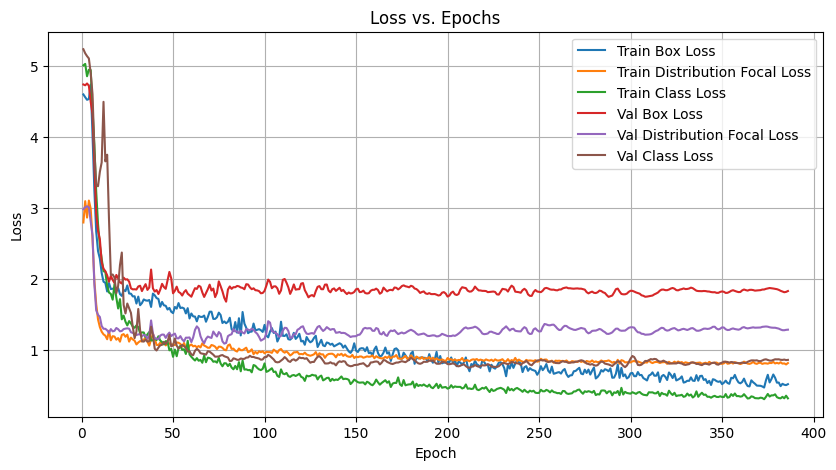

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取训练日志
log_path = '/kaggle/working/runs/detect/train7/results.csv'
df = pd.read_csv(log_path)
print(df)
print(print(df.columns)
)
# 去除列名的多余空格
df.columns = df.columns.str.strip()
# 绘制训练和验证损失随训练轮次变化的图像
plt.figure(figsize=(10, 5))

plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train Distribution Focal Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val Distribution Focal Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()


In [18]:
# 验证模型
metrics = model.val(data=data_config)

# 使用测试集进行预测
results = model.predict(source='/kaggle/working/mydataset/images/test', save=True)


Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /kaggle/working/mydataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]


                   all          5         74      0.861      0.966      0.944      0.467
                    c1          3          3      0.998          1      0.995      0.381
                    d1          3          5       0.97          1      0.995      0.532
                    e1          5         13      0.852          1       0.93      0.508
                    f1          4         10      0.745        0.9      0.921      0.436
                    g1          4         14      0.927          1      0.976      0.528
                    a1          5         10      0.904          1       0.95      0.425
                    b1          1          1      0.851          1      0.995      0.199
                    c2          3          6      0.917          1      0.995       0.67
                    d2          2          3      0.928          1      0.995      0.697
                    e2          3          7      0.718      0.729      0.801      0.407
                    f

/kaggle/working/mydataset/images/test/03.png


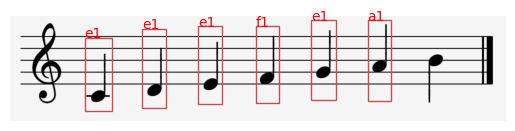

/kaggle/working/mydataset/images/test/16_11.jpg


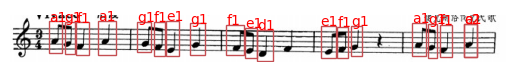

/kaggle/working/mydataset/images/test/16_12.jpg


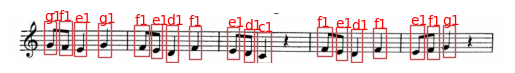

/kaggle/working/mydataset/images/test/17_1.jpg


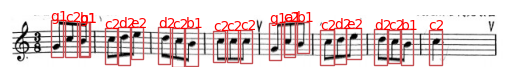

/kaggle/working/mydataset/images/test/17_4.jpg


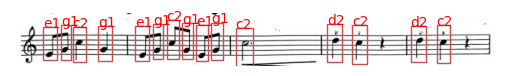

/kaggle/working/mydataset/images/test/17_6.jpg


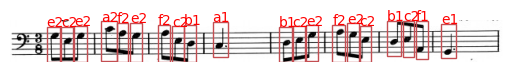

/kaggle/working/mydataset/images/test/18_8.jpg


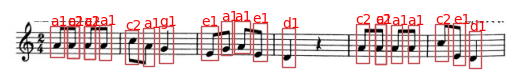

/kaggle/working/mydataset/images/test/19_10.jpg


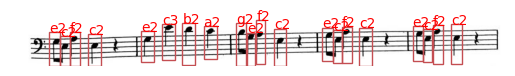

/kaggle/working/mydataset/images/test/20_1.jpg


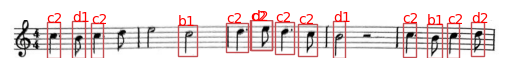

/kaggle/working/mydataset/images/test/32_6.png


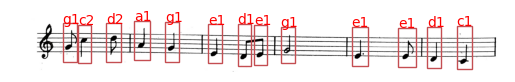

/kaggle/working/mydataset/images/test/llj3.jpg


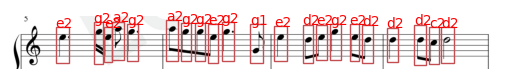

/kaggle/working/mydataset/images/test/llj5.jpg


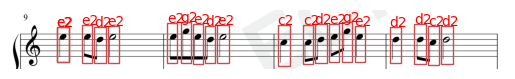

/kaggle/working/mydataset/images/test/llj8.jpg


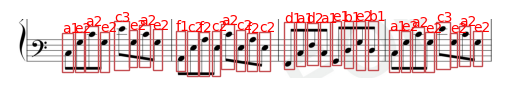

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


detection_info = []

for result in results:
    img_info = {
        "path": result.path,
        "boxes": [],
        "names": []
    }
    # 提取检测框和类别信息
    for box in result.boxes:

        box_info = {
            "coordinates_xy": box.xyxy.tolist(),
            "coordinates_wh": box.xywh.tolist(),
            "confidence": box.conf.tolist(),
            "class": result.names[int(box.cls.item())]
        }
        img_info["boxes"].append(box_info)
        img_info["names"].append(result.names[(box.cls.item())])

    detection_info.append(img_info)


for dete in detection_info:
  # 读取图像
  image = plt.imread(dete['path'])
  print(dete['path'])

  # 创建绘图对象
  fig, ax = plt.subplots()

  # 显示图像
  ax.imshow(image)

  # 为每个框绘制矩形
  for box in dete['boxes']:
      x, y, w, h = box['coordinates_xy'][0][0], box['coordinates_xy'][0][1], box['coordinates_wh'][0][2], box['coordinates_wh'][0][3]
      value = box['class']
      rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
      ax.add_patch(rect)
      plt.annotate(value, (x, y), color='red')

  # 关闭坐标轴
  plt.axis('off')

  # 显示绘图
  plt.show()